# Beispiel bestapproximierendes Element

In [1]:
import sympy as sp
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jo55xr6y because the default path (/home/jupyter-stiw/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
from sympy import pi

In [4]:
def dot(u,v):
    return sp.integrate(u*v,(t,-pi,pi))

In [5]:
n=5

In [6]:
t, k  = sp.symbols('t k')

In [7]:
def x(t):
    return sp.sin(t)

In [8]:
basisset = [t**i for i in range(n+1)]

In [9]:
basisset

[1, t, t**2, t**3, t**4, t**5]

In [10]:
A=[[dot(u,v) for u in basisset] for v in basisset]
A

[[2*pi, 0, 2*pi**3/3, 0, 2*pi**5/5, 0],
 [0, 2*pi**3/3, 0, 2*pi**5/5, 0, 2*pi**7/7],
 [2*pi**3/3, 0, 2*pi**5/5, 0, 2*pi**7/7, 0],
 [0, 2*pi**5/5, 0, 2*pi**7/7, 0, 2*pi**9/9],
 [2*pi**5/5, 0, 2*pi**7/7, 0, 2*pi**9/9, 0],
 [0, 2*pi**7/7, 0, 2*pi**9/9, 0, 2*pi**11/11]]

In [11]:
b=[dot(x(t),u) for u in basisset]
b

[0, 2*pi, 0, -12*pi + 2*pi**3, 0, -40*pi**3 + 2*pi**5 + 240*pi]

In [12]:
lam = sp.symbols('lambda:'+str(n+1))
lam

(lambda0, lambda1, lambda2, lambda3, lambda4, lambda5)

In [13]:
sol=sp.solve(np.dot(A,lam)-b)
sol

{lambda0: 0,
 lambda2: 0,
 lambda4: 0,
 lambda1: (-16065*pi**2 + 105*pi**4 + 155925)/(8*pi**6),
 lambda3: (-363825 - 315*pi**4 + 39375*pi**2)/(4*pi**8),
 lambda5: (-72765*pi**2 + 693*pi**4 + 654885)/(8*pi**10)}

In [14]:
bestapprox= np.dot([sol[lami] for lami in lam],basisset)
bestapprox

t**5*(-72765*pi**2 + 693*pi**4 + 654885)/(8*pi**10) + t**3*(-363825 - 315*pi**4 + 39375*pi**2)/(4*pi**8) + t*(-16065*pi**2 + 105*pi**4 + 155925)/(8*pi**6)

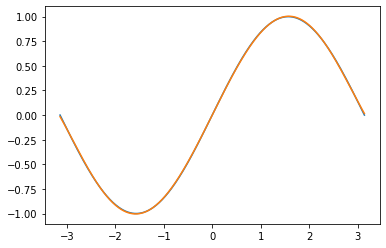

In [15]:
tp = np.linspace(-np.pi,np.pi,400)
plt.plot(tp,np.sin(tp))
plt.plot(tp,sp.lambdify(t,bestapprox)(tp))


In [16]:
sp.lambdify(t,bestapprox)

<function _lambdifygenerated(t)>

In [19]:
sumsq = dot(bestapprox-x(t),bestapprox-x(t))
sumsq

-287280/pi**5 - 19646550/pi**9 - 42/pi + pi + 5040/pi**3 + 4365900/pi**7

In [20]:
sumsq.evalf()

0.000116168839090505

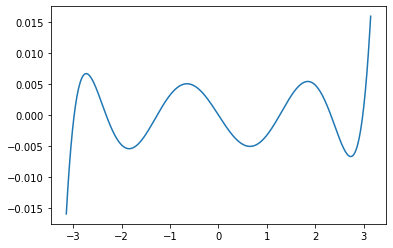

In [22]:
plt.plot(tp,sp.lambdify(t,bestapprox)(tp)-np.sin(tp))